In [1]:
import torch
import itk, itkwidgets
import nibabel as nib
import numpy as np
import pandas as pd
from lib.utils import *
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [2]:
def plot_single_image(img):    
    def explore_3dimage(depth):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 1, 1)
        plt.imshow(np.expand_dims(img.get_fdata(), axis=3)[:, :, depth, :], cmap='gray')
        plt.title("MRI")
        plt.axis('off')

    interact(explore_3dimage, depth=(0, img.shape[2] - 1));

In [3]:
df = pd.read_csv("NFBS_Dataset_meta.csv")

In [4]:
skull, brain, mask = df.iloc[0]

In [5]:
img = np.expand_dims(nib.load(skull).get_fdata(), axis=3)

In [6]:
def image_histogram_equalization(image, number_bins=70):
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)

In [7]:
h = image_histogram_equalization(img, number_bins=20)

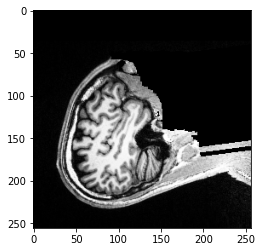

In [8]:
plt.imshow(h[:, :, 52, :], cmap='gray')

In [9]:
h = IntensityNormalization()(h)

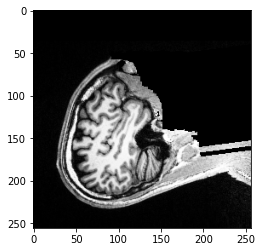

In [10]:
plt.imshow(h[:, :, 52, :], cmap='gray')

In [11]:
def plot_single_image(img):
    # img = nib.load(img).get_fdata()
    
    def explore_3dimage(depth):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 1, 1)
        plt.imshow(img[:, :, depth, :], cmap='gray')
        plt.title("MRI")
        plt.axis('off')

    interact(explore_3dimage, depth=(0, img.shape[2] - 1));

In [12]:
plot_single_image(h)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…

In [13]:
skull, brain, mask = df.iloc[0]

In [14]:
skull = nib.load(skull).get_fdata()
mask = nib.load(mask).get_fdata()

In [15]:
img = skull[:, :, :, np.newaxis]
bm = mask[:, :, :, np.newaxis]

img = IntensityNormalization()(img)
bm = IntensityNormalization()(bm)

In [16]:
img.shape

(256, 256, 192, 1)

In [17]:
res = img * bm
res = np.where(bm >= 0.5, img, bm)

(-0.5, 255.5, 255.5, -0.5)

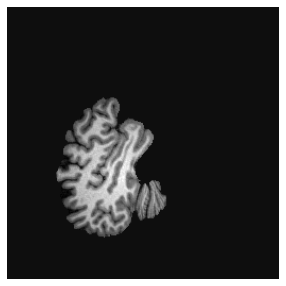

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(res[:, :, 52, :], cmap='gray')
plt.axis('off')

In [19]:
skull, brain, mask = df.iloc[0]

In [20]:
skull

'NFBS_Dataset\\A00028185\\sub-A00028185_ses-NFB3_T1w.nii.gz'

In [21]:
mask

'NFBS_Dataset\\A00028185\\sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz'

In [22]:
img = nib.load('T1Img/sub-02/anat_img.nii.gz').get_fdata()[:, :, :, np.newaxis]

In [23]:
img = image_histogram_equalization(img, number_bins=20)
img = IntensityNormalization()(img)

In [24]:
plot_single_image(img)

interactive(children=(IntSlider(value=127, description='depth', max=255), Output()), _dom_classes=('widget-int…

In [25]:
img = nib.load('bias_corrected_image.nii.gz').get_fdata()[:, :, :, np.newaxis]

In [26]:
h = image_histogram_equalization(img)

In [27]:
plot_single_image(h)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…